## 1.1 

(1) You have $50,000 invested now and you plan to invest $20,000 in one year and another $20,000 at the end of the following four years (five investments of $20,000 in five years in total). If you earn 6% per year on my investments, what will you have at the end of the five years, including the final investment?

(2) You have $50,000 now and plan to invest money at the end of this year and also for the following four years (five investments in five years in total). You expect to earn 6% per year. You hope to have $200,000 at the end of the five years, including the last investment. How much do you need to invest each year?

In [1]:
import numpy as np 

investments = 1000 * np.array([50, 20, 20, 20, 20, 20])
fv_factors = 1.06**np.arange(5, -1, -1)
future_value = np.sum(investments*fv_factors)
print(f"Answer to (1) is ${future_value:,.2f}")

pv = 50000
fv = pv * 1.06**5
deficit = 200000 - fv 
fv_factors = 1.06**np.arange(4, -1, -1)
savings = deficit / np.sum(fv_factors)
print(f"Answer to (2) is ${savings:,.2f}")

Answer to (1) is $179,653.14
Answer to (2) is $23,609.46


## 1.2

An investment earned 10%, 15%, -8%, -3%, and 20% over a five-year span.  

(1) What were the corresponding continuously compounded returns?

(2) What was the sum of the continuously compounded returns?

(3) If you started with $1 and earned these returns, what did you have at the end of the five years?

(4) How does the natural exponential of the sum of the continuously compounded returns compare to the answer to (3)?

In [2]:
returns = np.array([0.1, 0.15, -0.08, -0.03, 0.2])
cont_comp_returns = np.log(1 + returns)
sum = np.sum(cont_comp_returns)
accumulation = np.prod(1+returns)
exponential = np.exp(sum)
print(f"Answer to 1 is {cont_comp_returns}")
print(f"Answer to 2 is {sum}")
print(f"Answer to 3 is {accumulation}")
print(f"Exponential of the sum is {exponential}")
print("Answer to 4 is that the two are the same.")

Answer to 1 is [ 0.09531018  0.13976194 -0.08338161 -0.03045921  0.18232156]
Answer to 2 is 0.30355286254967856
Answer to 3 is 1.3546631999999998
Exponential of the sum is 1.3546632
Answer to 4 is that the two are the same.


## 1.3

(1) What would the monthly payments be on a 5-year loan for $40,000 at 6%?

(2) How much can you borrow on a 5-year loan at 6% if you can afford to pay $500 per month?

In [3]:
import numpy_financial as npf 

pmt = npf.pmt(rate=0.06/12, nper=5*12, pv=-40000)
pv = npf.pv(rate=0.06/12, nper=5*12, pmt=-500)
print(f"Answer to 1 is ${pmt:.2f}")
print(f"Answer to 2 is ${pv:,.2f}")

Answer to 1 is $773.31
Answer to 2 is $25,862.78


## 1.4

An investment earned 10%, 15%, -8%, -3%, and 20% over a five-year span. Inflation over the five years was 3%, 5%, 7%, 4%, and 2%.  How much did $1 at the beginning of the five years grow to in nominal terms?  In real terms?

In [4]:
nominal_rets = np.array([0.1, 0.15, -0.08, -0.03, 0.2])
inflation = np.array([0.03, 0.05, 0.07, 0.04, 0.02])
nominal_accumulation = np.prod(1+nominal_rets)
real_accumulation = nominal_accumulation / np.prod(1+inflation)
print(f"In nominal terms, it grew to ${nominal_accumulation:.2f}")
print(f"In real terms, it grew to ${real_accumulation:.2f}")

In nominal terms, it grew to $1.35
In real terms, it grew to $1.10


## 1.5

You plan to make monthly deposits to an account for the next 30 years and then make monthly withdrawals for 30 years with the same timing as in the lecture.  There is $100,000 in the account now.  Your first deposit will be $1,000 and the deposits will grow at 0.2% per month.  Your withdrawals will be constant.  Answer each of the following in the text box below.  To possibly get partial credit for an incorrect answer, explain your calculations.

(1) How much can you withdraw each month if you make (a) 0.3% per month, (b) 0.5% per month, (c) 0.8% per month?

(2) Plot the account balance over time for part (b) of question 1.

Answer to 1a is $5,353.11
Answer to 1b is $11,486.69
Answer to 1c is $36,637.39


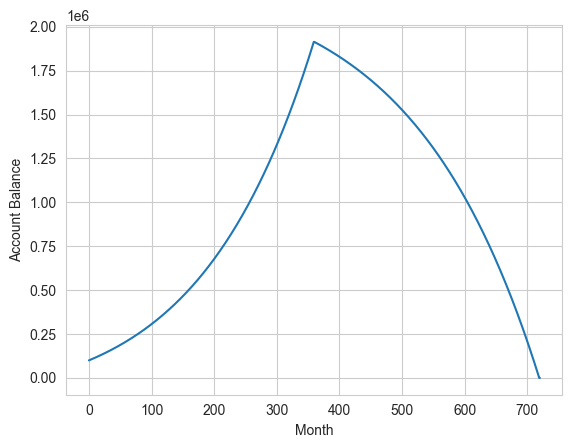

In [5]:
growth_factors = 1.002**np.arange(30*12)
deposits = 1000*growth_factors

def withdrawal(r):
    fv_initial_balance = 100000*(1+r)**(60*12)
    fv_deposits = np.sum(deposits*(1+r)**np.arange(60*12-1, 30*12-1, -1))
    withdrawal_fv_factors = (1+r)**np.arange(30*12, 0, -1)
    return (fv_initial_balance + fv_deposits) / np.sum(withdrawal_fv_factors)

print(f"Answer to 1a is ${withdrawal(0.003):,.2f}")
print(f"Answer to 1b is ${withdrawal(0.005):,.2f}")
print(f"Answer to 1c is ${withdrawal(0.008):,.2f}")

W = withdrawal(0.005)
B = np.zeros(60*12 + 1)
B[0] = 100000
for i in range(1, 30*12 + 1):
    B[i] = B[i-1]*1.005 + 1000*1.002**(i-1)
B[30*12] -= W 
for i in range(30*12+1, 60*12):
    B[i] = B[i-1]*1.005 - W
B[60*12] = B[60*12-1] * 1.005

import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style("whitegrid")
plt.plot(range(60*12+1), B)
plt.xlabel("Month")
plt.ylabel("Account Balance")
plt.show()